In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Load & Process

In [93]:
df = pd.read_csv(f"data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [94]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
df_dropped = df.drop(list_to_drop, axis = 1)

In [95]:
# df_dropped.shape,
desc_df = df_dropped.describe()

desc_df.loc['std',:].sort_values()

policy_code                                   0.000000e+00
num_tl_120dpd_2m                              2.157487e-02
num_tl_30dpd                                  5.107280e-02
acc_now_delinq                                6.346707e-02
chargeoff_within_12_mths                      1.022904e-01
collections_12_mths_ex_med                    1.442911e-01
sec_app_collections_12_mths_ex_med            3.359442e-01
sec_app_chargeoff_within_12_mths              3.485665e-01
pub_rec_bankruptcies                          3.543980e-01
tax_liens                                     3.657402e-01
num_tl_90g_dpd_24m                            4.565536e-01
pub_rec                                       5.507502e-01
deferral_term                                 5.628247e-01
hardship_length                               5.628247e-01
delinq_2yrs                                   8.235203e-01
inq_last_6mths                                8.627038e-01
open_il_12m                                   9.413304e-


STD from desc object

total_rec_prncp                               8.669888e+03,
hardship_payoff_balance_amount                9.246628e+03,
funded_amnt                                   9.467415e+03,
loan_amnt                                     9.468190e+03,
funded_amnt_inv                               9.470919e+03,
total_pymnt_inv                               1.033363e+04,
total_pymnt                                   1.033736e+04,
avg_cur_bal                                   1.669322e+04,
bc_open_to_buy                                1.809939e+04,
revol_bal                                     2.239829e+04,
revol_bal                                     2.239829e+04,
total_bc_limit                                2.448759e+04,
revol_bal_joint                               3.185786e+04,
total_rev_hi_lim                              3.582365e+04,
total_bal_il                                  4.607293e+04,
total_il_high_credit_limit   

interesting that these have very large variances -> early feature contendors, depending on definition

In [96]:
df_dropped.nunique().sort_values()

pymnt_plan                                         1
policy_code                                        1
application_type                                   2
hardship_flag                                      2
debt_settlement_flag                               2
initial_list_status                                2
term                                               2
verification_status_joint                          3
num_tl_120dpd_2m                                   3
verification_status                                3
hardship_status                                    4
hardship_length                                    4
deferral_term                                      4
num_tl_30dpd                                       4
acc_now_delinq                                     5
home_ownership                                     6
hardship_type                                      6
chargeoff_within_12_mths                           6
sec_app_collections_12_mths_ex_med            

In [97]:
df_dropped.loan_status.value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [98]:
charged_off_loans = df_dropped[df_dropped.loan_status == "Charged Off"]

# Calculate average size of charged off loan
average_size_loan = charged_off_loans['loan_amnt'].mean()
formatted_average_size_loan = f"${average_size_loan:,.2f}"
print(f"""Average size of charged off loan:
         {
             formatted_average_size_loan
         }""")

Average size of charged off loan:
         $15,784.87


In [99]:
# Quite a few nulls that need to be resolved.
df_dropped.isnull().sum()

id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

In [100]:
# Create hardship flag based on information provided by data SMEs in the business
df_dropped['hardship_status_filled'] = df_dropped['hardship_status'].fillna("NO_HARDSHIP")
print(f"Nulls after filling: {df_dropped['hardship_status_filled'].isnull().sum()}")

Nulls after filling: 0


In [101]:
# Imputation: Filling missing values with the mean for numerical columns
df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)
print(f"Nulls after filling: {df_dropped['num_accts_ever_120_pd'].isnull().sum()}")

Nulls after filling: 0


/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_25838/272564520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['num_accts_ever_120_pd'].fillna(df_dropped['num_accts_ever_120_pd'].mean(), inplace=True)


In [102]:
# Checking for duplicate rows
duplicates = df_dropped.duplicated().sum()
duplicates

0

In [103]:
# Removing duplicate rows
df_deduped = df_dropped.drop_duplicates(inplace=True)

try:
    df_deduped.shape # Note: it will fail if empty (i.e. no duplicates)
except:
    print("No duplicates")

No duplicates


### Outlier Detection

In [104]:
from scipy import stats
import numpy as np
import seaborn as sns

z_scores = np.abs(stats.zscore(df_dropped.select_dtypes(include=[np.number])))

threshold = 3

for i in range(200, 301, 25):
    thresh = threshold/100
    print(f"Threshold == {thresh}, {df_dropped[np.abs(z_scores)>thresh].shape[0]} outliers ")
    

gt_thresh = z_scores > threshold
outlier_volume = pd.DataFrame(gt_thresh.sum(), columns=["num_outliers"])
outlier_volume.sort_values(by = "num_outliers"
                          , ascending= False)

Threshold == 0.03, 100000 outliers 
Threshold == 0.03, 100000 outliers 
Threshold == 0.03, 100000 outliers 
Threshold == 0.03, 100000 outliers 
Threshold == 0.03, 100000 outliers 


,num_outliers
last_pymnt_amnt,2707
out_prncp,2704
out_prncp_inv,2703
delinq_2yrs,2346
num_accts_ever_120_pd,2204
total_rec_int,2130
recoveries,2068
collection_recovery_fee,1982
pub_rec,1807
last_fico_range_low,1790


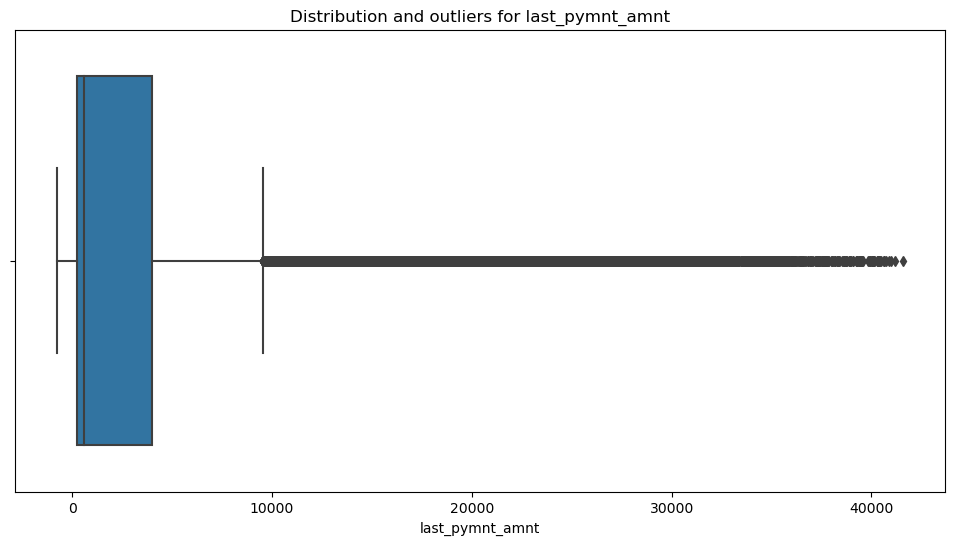

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "last_pymnt_amnt"

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Going with removal of outliers.

firstly cons -> smaller sample size, risk of threshold mispecification.

pros -> simpler and less noisy data, potential upside to model performance and improve accuracy.

overall -> alot can go wrong with transforming and capping outliers making the modelling more complex. A 
            simpler framework that's successful is a good first step.
           

In [106]:
# Removing outliers
field_to_treat = "last_pymnt_amnt"

df_no_outliers = df_dropped[(z_scores[field_to_treat] < threshold)]
df_no_outliers.shape

(97293, 142)

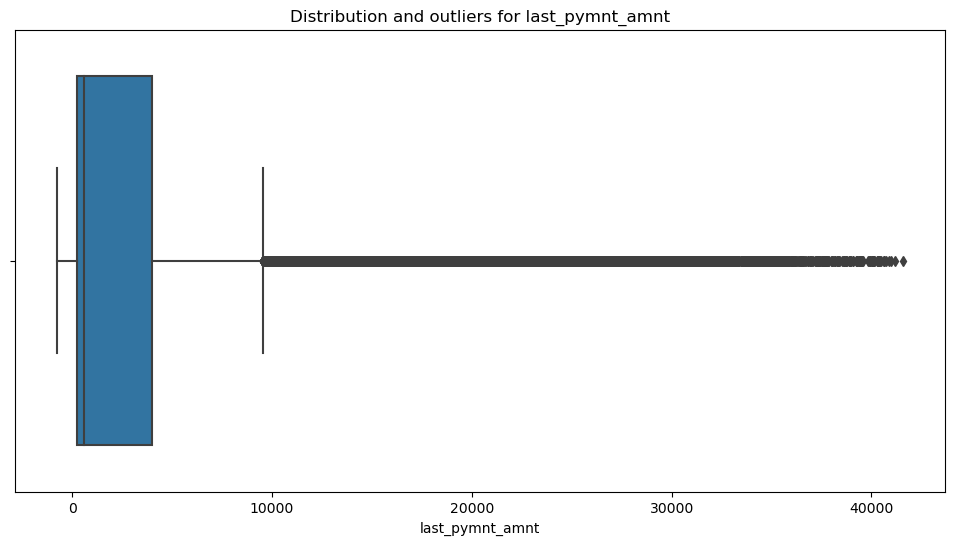

In [107]:
# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_dropped[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

In [108]:
df_dropped['url'].value_counts()[:5]

url
https://lendingclub.com/browse/loanDetail.action?loan_id=167338079    1
https://lendingclub.com/browse/loanDetail.action?loan_id=693399       1
https://lendingclub.com/browse/loanDetail.action?loan_id=119962746    1
https://lendingclub.com/browse/loanDetail.action?loan_id=161374059    1
https://lendingclub.com/browse/loanDetail.action?loan_id=74591293     1
Name: count, dtype: int64

### Feature Engineering

In [109]:
import re

def extract_loan_id_from_url(mystring):
    keyword = '='
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    return after_keyword

df_dropped['loan_id_extracted'] = df_dropped['url'].apply(extract_loan_id_from_url)
df_dropped[['id','url','loan_id_extracted']][:5]

,id,url,loan_id_extracted
0,167338079,https://lendingclub.com/browse/loanDetail.acti...,167338079
1,71016917,https://lendingclub.com/browse/loanDetail.acti...,71016917
2,39589826,https://lendingclub.com/browse/loanDetail.acti...,39589826
3,134798709,https://lendingclub.com/browse/loanDetail.acti...,134798709
4,127097355,https://lendingclub.com/browse/loanDetail.acti...,127097355


In [110]:
# Cleaning text data
df_dropped['emp_title_clean'] = df_dropped['emp_title'].str.lower().str.strip()
df_dropped['emp_title_clean'].value_counts()[:10]

df_dropped['emp_title_manager'] = df_dropped['emp_title_clean'].str.contains("manager")
df_dropped['emp_title_manager'].value_counts()

df_dropped['emp_length_clean'] = df_dropped['emp_length'].str.split(' ').str.get(0).str.replace('+','').str.replace('<','')

selected_columns = df_dropped[["emp_title_manager", "emp_title_clean"]]
unique_combinations = selected_columns.drop_duplicates()
unique_combinations.head(10)

,emp_title_manager,emp_title_clean
0,False,cashier
1,False,abm
2,False,driver
3,NaN,NaN
4,False,shipping clerk
5,False,csr
6,False,cdc lll
7,False,snr scientist
9,False,pharmacist
10,False,billing specialist


### Joining to external data

In [111]:
ref_job_families = pd.read_csv(rf"data/1-raw/emp_title_mapping.csv")
ref_job_families.head()

print(f"Number of existing job families: {ref_job_families.Category.nunique()}")

Number of existing job families: 32


In [112]:
df_mapped = pd.merge(left = df_dropped
                     , right = ref_job_families
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )


In [113]:
print(df_dropped.shape, df_mapped.shape)

(100000, 146) (102265, 148)


In [114]:
# Let's check if there are any duplicates in the reference file:
print(ref_job_families.shape)
print(ref_job_families.drop_duplicates().shape)

(91, 2)
(89, 2)


In [115]:
# The problem can be seen by grouping the ref data by job title and category:
row_count = ref_job_families.groupby(["Category", "Job Title"]).size().reset_index(name='count')
row_count[row_count['count'] > 1]

,Category,Job Title,count
17,Education,teacher,2
35,Healthcare,medical assistant,2


In [116]:
ref_job_families[ref_job_families["Job Title"] == "medical assistant"]

,Job Title,Category
70,medical assistant,Healthcare
88,medical assistant,Healthcare


In [117]:
ref_job_families_deduped = ref_job_families.drop_duplicates()
print(ref_job_families.shape, ref_job_families_deduped.shape)

(91, 2) (89, 2)


In [118]:
df_mapped_deduped = pd.merge(left = df_dropped
                     , right = ref_job_families_deduped
                     , left_on = "emp_title_clean"
                     , right_on= "Job Title"
                     , how = "left"
                    )
print(df_dropped.shape, df_mapped_deduped.shape)

(100000, 146) (100000, 148)


In [119]:
# Extracting features from date column
df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'])

/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_25838/398318754.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dropped['issue_d'] = pd.to_datetime(df_dropped['issue_d'])


In [120]:
ts_loans = pd.DataFrame(df_dropped.groupby("issue_d").count()["id"],
                       index = None)
ts_loans.head()

,id
issue_d,
2007-07-01,4
2007-08-01,3
2007-09-01,2
2007-10-01,5
2007-11-01,3


In [121]:
# Let's check type of our index is as expected
ts_loans.index

DatetimeIndex(['2007-07-01', '2007-08-01', '2007-09-01', '2007-10-01',
               '2007-11-01', '2007-12-01', '2008-01-01', '2008-02-01',
               '2008-03-01', '2008-04-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='issue_d', length=159, freq=None)

In [122]:
ts_loans.index.to_series().diff()[:5]

issue_d
2007-07-01       NaT
2007-08-01   31 days
2007-09-01   31 days
2007-10-01   30 days
2007-11-01   31 days
Name: issue_d, dtype: timedelta64[ns]

In [123]:
# Resample to monthly frequency, using mean for aggregation
ts_loans_yearly = ts_loans.resample('Y').sum() # Alternatively, use mean()

ts_loans_yearly

/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_25838/3295013148.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_loans_yearly = ts_loans.resample('Y').sum() # Alternatively, use mean()


,id
issue_d,
2007-12-31,20
2008-12-31,86
2009-12-31,184
2010-12-31,459
2011-12-31,787
2012-12-31,1720
2013-12-31,4492
2014-12-31,8227
2015-12-31,14386


In [124]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# #Set the Seaborn style
# sns.set(style="darkgrid")

# # Create the plot
# plt.figure(figsize=(14, 7))
# sns.lineplot(x=ts_loans_yearly.index, y=ts_loans_yearly['id'])

# # Adding titles and labels
# plt.title('Time Series Plot')
# plt.xlabel('Date')
# plt.ylabel('Value')

# # Show the plot
# plt.show()

In [125]:
df_dropped['year'] = df_dropped['issue_d'].dt.year
df_dropped['month'] = df_dropped['issue_d'].dt.month
df_dropped['day'] = df_dropped['issue_d'].dt.day
df_dropped['week'] = df_dropped['issue_d'].dt.isocalendar().week

In [126]:
df_mapped_deduped['fico_range_change'] = (df_mapped_deduped['fico_range_high'] - df_mapped_deduped['last_fico_range_high'])
df_mapped_deduped['debt_to_income'] = df_mapped_deduped['loan_amnt'] / df_mapped_deduped['annual_inc']
df_mapped_deduped['int_rate_clean'] = df_mapped_deduped['int_rate'].str.rstrip('%').astype('float') / 100.0
df_mapped_deduped['term_numeric'] = df_mapped_deduped['term'].str.strip(" months")
df_mapped_deduped['interest_per_loan_amnt'] =  df_mapped_deduped['loan_amnt'] * df_mapped_deduped['int_rate_clean'] * df_mapped_deduped['term_numeric'].astype('float')/12

df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

In [127]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
df_mapped_deduped['grade_encoded'] = le.fit_transform(df_mapped_deduped['grade'])
df_mapped_deduped['emp_title_clean_encoded'] = le.fit_transform(df_mapped_deduped['emp_title_clean'])
df_mapped_deduped[['grade', 'grade_encoded', 'emp_title_clean', 'emp_title_clean_encoded']].head()

,grade,grade_encoded,emp_title_clean,emp_title_clean_encoded
0,B,1,cashier,4396
1,B,1,abm,166
2,B,1,driver,9633
3,B,1,NaN,33073
4,C,2,shipping clerk,27037


In [128]:
df_final = df_mapped_deduped.copy()

In [129]:
# Create hardship flag based on information provided by data SMEs in the business
df_final['hardship_status_filled'] = df_final['hardship_status'].fillna("NO_HARDSHIP")
print(f"Nulls after filling: {df_final['hardship_status_filled'].isnull().sum()}")

# Imputation: Filling missing values with the mean for numerical columns
df_final['num_accts_ever_120_pd'].fillna(df_final['num_accts_ever_120_pd'].mean(), inplace=True)
print(f"Nulls after filling: {df_final['num_accts_ever_120_pd'].isnull().sum()}")

Nulls after filling: 0
Nulls after filling: 0


/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_25838/2226437220.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['num_accts_ever_120_pd'].fillna(df_final['num_accts_ever_120_pd'].mean(), inplace=True)


In [130]:
df_final['hardship_dpd'] = df_final['hardship_dpd'].fillna(0)
df_final['percent_bc_gt_75'] = df_final['percent_bc_gt_75'].fillna(0)
df_final['tot_cur_bal'] = df_final['tot_cur_bal'].fillna(df_final['tot_cur_bal'].mean())

In [131]:
# Imputation: Filling missing values with the mean for numerical columns
df_final['num_accts_ever_120_pd'].fillna(df_final['num_accts_ever_120_pd'].mean(), inplace=True)
print(f"Nulls after filling: {df_final['num_accts_ever_120_pd'].isnull().sum()}")

Nulls after filling: 0


/var/folders/28/vl2dxjyx0fq84vlrqp4rsh_h0000gn/T/ipykernel_25838/906550788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['num_accts_ever_120_pd'].fillna(df_final['num_accts_ever_120_pd'].mean(), inplace=True)


In [132]:
df_final.to_csv(rf"data/2-intermediate/out_df2.csv"
                        , index = False)